### **Introducción**

**¿Qué son las series temporales?**
- Una serie temporal es una secuencia de datos indexados en el tiempo, es decir, cada valor está asociado a una fecha y/u hora específica.
- Casos típicos: datos financieros (acciones), registros de sensores, clima, logs de sistemas.
- En pandas, las series temporales se representan con DatetimeIndex, PeriodIndex o TimedeltaIndex.

In [ ]:
import numpy as np
import pandas as pd

### **Fechas y tiempos en pandas**

La libreria estandar de python ingluye tipos de datos para fecha y hora como lo son **datetime**, esta funcion se suele utilizar mucho, existen otras como *time* o *calendar*

In [ ]:
from datetime import datetime
from datetime import timedelta

now = datetime.now()
now
#Resultado: datetime.datetime(2024, 6, 14, 12, 34, 56)
#podemos operar con fechas, como por ejemplo restar dos fechas
diferencia = datetime.now() - datetime(2024, 6, 14, 12, 34, 56)
diferencia
#Resultado: datetime.timedelta(days=438, seconds=36638, microseconds=164857)
#En timedelta se almacena la diferencia de tiempo, esto puede ser tanto suma o resta, a partir de esto se 
#puede obtener solo los dias por ejemplo
diferencia.days
#Resultado: 438

start = datetime(2024, 1, 1)
start + timedelta(12)    
#Resultado: datetime.datetime(2024, 1, 13, 0, 0)
#Podemos sumar dias a una fecha, en este caso 12 dias a la fecha 

datetime.datetime(2024, 1, 13, 0, 0)

### Conversión de texto a datetime
- Se puede pasar de objetos *datetime* a *Timestap* como cadenas de texto utilizando *str*
- El metodo *datetime.strptime* es una maera de analizar una fecha con un formato conocido

ahora bien, panda normalamente analiza muchos tipos distintos de represetacion de fechas esto lo hace con **pandas.to_datetime**

In [ ]:
from datetime import datetime
stamp = datetime(2011, 1, 3)

str(stamp)
#Resultado: '2011-01-03 00:00:00'
#se el puede dar un formato especifico de la siguiente manera
stamp.strftime('%Y-%m-%d')
#Resultado: '2011-01-03'

#metodo inverso
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
#Resultado: datetime.datetime(2011, 1, 3, 0, 0)
datestrs = ['07/06/2011', '08/06/2011']
[datetime.strptime(x, '%d/%m/%Y') for x in datestrs]
#Resultado: [datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

#Meotodo de pandas to_datetime
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00','2011-07-20 00:00:00']
pd.to_datetime(datestrs)
idx = pd.to_datetime(datestrs + [None])
idx [0]

Timestamp('2011-07-06 12:00:00')

# Fundamentos de las series temporales
Una serie temporal en pandas es una serie indexada por maras temporales, fuera de panas se presenta como una cadena de texto o como un objeto *datetime*

In [ ]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1,8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts
#Resultado:
'''
011-01-02    0.567295
2011-01-05   -1.045975
2011-01-07   -1.386149
2011-01-08   -0.537558
2011-01-10   -0.140718
2011-01-12   -0.472162
dtype: float64'''
#estos objetos quedaron reservados en un datetimeindex
ts.index
#Resultado: DatetimeIndex('2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
#               '2011-01-10', '2011-01-12'], d

2011-01-02    0.567295
2011-01-05   -1.045975
2011-01-07   -1.386149
2011-01-08   -0.537558
2011-01-10   -0.140718
2011-01-12   -0.472162
dtype: float64

Los valores escalares de un **DatetimeIndex** son objetos **Timestap** de pandas.

los objetos *Timestap* se puede sustituir por un objeto datetime pero a la iversa es imposible porque *Timestap* puede almacenar nanosegundos cosa que no puede datetime. Adenas *Timestamp* puede almacenar informacion de frecuencias (si es que hay) y comprende como realizar conversiones de zona horaria y otros tipos de manipulaciones.

### Indexación, Selección y Creación de subconjuntos

Las series se comportan como cualquier otra serie indexada seleccionando datos basados en etiquetas

In [ ]:
stamp= ts.index[0]  #Resulado: Timestamp('2011-01-02 00:00:00')
ts[stamp]           #Resultado: 0.567295
#Tambien se puede usar directamente
ts['2011-01-02']   #Resultado: 0.567295


np.float64(0.5672949853362145)

Para series mas largas, podemos filtrar un conjunto de datos indicando 
- el año solamente por ejemplo
- podemos utilizar segmentos
- utilizar segmentos con *datetime*

In [ ]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range('2000-01-01', periods=1000))

longer_ts['2002'] 
#podemos filtrar por mes(tenemos que acalar el año primero)
longer_ts['2001-05']
# Y asi sucesivamente por ejemplo por un dia
longer_ts['2001-05-17'] #resultado: -0.6749...
#longer_ts

np.float64(-0.6749316964468116)

In [ ]:
#volviendo con nuestra serie ts, podemos usar segmentos de la siguiente manera:
ts[datetime(2011, 1, 7):datetime(2011, 1, 11)]  #Resultado:
#podemo usar strings, en vez de objetos datetime, dando el mismo resultado
ts['2011-01-07':'2011-01-11']

2011-01-07   -1.386149
2011-01-08   -0.537558
2011-01-10   -0.140718
dtype: float64

Recuerda!! Segmentar de este modo produce una serie temporales segun la original. Esto significa que no se copian datos, y que la modificacion de la segmentacion se veran en los datos originales

# Rango de fechas, frecuencias y desplazamiento
Las series temporales no sulen tener una frecuencia fija, por suerte pandas tiene formas de solucionarlo.
Por ejemplo se puede cambiar la frecuancia de una serie con la funcion *resample()*, se lo indica con un alias dentro del *resample()* algunos son:

D = dias, H = Horas, T = Minute, S = segundos, L = miliS, U = micro

In [ ]:
ts
resampler = ts.resample('D')  #Resampleo diario

### Generacion de rangos de fechas
Se puede generar fechas utilizando la funcion *date_range*, esto nos genera objetos datatimeIndex(ej 1)

se puede generar series temporales indicando el inicio y una cierta cantidad a generar desde ese inicio(ej 2), o un final y una cantidad previa a ese final(ej 3).

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

pd.date_range(start='2012-04-01', periods=20)

pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

### Frecuencias y desfases de fechas

las frecuencias en *pandas* estan formadas por una freuencia base y un multiplicador.

Una frecuencia base podria ser horas ("h") y un multiplicador podria ser un numero. 

Entonces por ejemplo si queremos una freciencia de 6 horas, podemos hacer lo siguiete:

In [ ]:
from pandas.tseries.offsets import Hour, Minute
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='6h')
# tambien se puede tener una frecuencia compuesta por asi decirlo
pd.date_range('2000-01-01', periods=10, freq='1h30min')
# Una frecuencia para tener en cueta es la WOM(week of month: semana del mes). permite obtener el 3er domingos de cada mes
monthly_dates = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3SUN')
monthly_dates

DatetimeIndex(['2012-01-15', '2012-02-19', '2012-03-18', '2012-04-15',
               '2012-05-20', '2012-06-17', '2012-07-15', '2012-08-19'],
              dtype='datetime64[ns]', freq='WOM-3SUN')

### Desplazamiento de los datos(adelantar o retrasar)
cuando decimos "desplazar" nos referimos a mover los datos en el tiempo, los objetos series *DataFrame* tienen un metodo shitf para hacer esto sin modificar los indicies:

In [ ]:
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range('2000-01-01', periods=4, freq='ME')) 
''' 2000-01-31    1.322886
    2000-02-29   -2.789592
    2000-03-31    0.832478
    2000-04-30   -0.466027
    Freq: ME, dtype: float64 '''
ts.shift(2)  #desplaza para adelnate 2 periodos
#Resultado:
''' 2000-01-31         NaN
    2000-02-29         NaN 
    2000-03-31    1.322886
    2000-04-30   -2.789592
    Freq: ME, dtype: float64 '''
ts.shift(-2) #desplaza para atras 2 periodos


2000-01-31    1.420332
2000-02-29    0.821944
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

Si la fracuencia es conocida se puede pasar a *shift* para adelantar las marcas temporales

In [ ]:
ts.shift(2, freq='ME') #desplaza 2 meses en el tiempo
#Resultado:
''' 2000-03-31    1.322886
    2000-04-30   -2.789592
    2000-05-31    0.832478
    2000-06-30   -0.466027
    Freq: M, dtype: float64 '''

ts.shift(1, freq='90min')  #desplaza 3 periodos de 90 minutos
#Resultado: 

2000-01-31 01:30:00    0.895213
2000-02-29 01:30:00    0.904915
2000-03-31 01:30:00    1.420332
2000-04-30 01:30:00    0.821944
dtype: float64

Tengamos en cuenta que *shift()* solo desplaza todo el calendario, no el estructura original de los datos

### Manipulacion de zonas horarias
En pandas se puede utilizar el tiempo coordinado universal(UTC), las zonas horarias se expresan en desfases partiendo de este standar

In [ ]:
import pytz
pytz.common_timezones[:]
tz = pytz.timezone('America/Argentina/Buenos_Aires')
tz

<DstTzInfo 'America/Argentina/Buenos_Aires' LMT-1 day, 20:06:00 STD>

### Localizacion y conversion de zonas horarias

Las series temporales no son conscientes de la zonas horarias a la que perteneces y general mente no tienen una asociada.

In [ ]:
dates = pd.date_range('2012-03-09 09:30', periods=6)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts
#El campo tz del indice es None
#print(ts.index.tz)   #resultado: None

2012-03-09 09:30:00    0.069026
2012-03-10 09:30:00    0.226568
2012-03-11 09:30:00    0.066634
2012-03-12 09:30:00    0.023054
2012-03-13 09:30:00    1.347226
2012-03-14 09:30:00    0.551301
Freq: D, dtype: float64

**ts.index.tz** indica la zona horaria asociada al indice de la fechas de la serie temporal.
Si el resultado es None como en nuestro caso, significa que la serie **no tiene una zona horaria asignada**.

Sep pueden general rango de fecha con una zona horaria fijada, de la siguiente manera:

In [ ]:
pd.date_range('2012-03-09 09:30', periods=5, freq='D', tz='America/Argentina/Buenos_Aires')



2012-03-09 09:30:00-03:00    0.069026
2012-03-10 09:30:00-03:00    0.226568
2012-03-11 09:30:00-03:00    0.066634
2012-03-12 09:30:00-03:00    0.023054
2012-03-13 09:30:00-03:00    1.347226
2012-03-14 09:30:00-03:00    0.551301
dtype: float64

Tambien es posible convertir una serie temporal sin zona horaria a una con zona horaria

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.069026
2012-03-10 09:30:00+00:00    0.226568
2012-03-11 09:30:00+00:00    0.066634
2012-03-12 09:30:00+00:00    0.023054
2012-03-13 09:30:00+00:00    1.347226
2012-03-14 09:30:00+00:00    0.551301
Freq: D, dtype: float64

Una vez una serie fue localizada en una zona horaria se la puede convertir en otra zona horaria de la siguiente manera:

In [ ]:
ts_utc.tz_convert('America/Argentina/Buenos_Aires')

2012-03-09 06:30:00-03:00    0.069026
2012-03-10 06:30:00-03:00    0.226568
2012-03-11 06:30:00-03:00    0.066634
2012-03-12 06:30:00-03:00    0.023054
2012-03-13 06:30:00-03:00    1.347226
2012-03-14 06:30:00-03:00    0.551301
Freq: D, dtype: float64

### Operaciones con objetos de marca temporal conscientes de la zona horaria

Los objeotos *Timestamp* tambien pueden tener una zona horaria:

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')
#resultado: Timestamp('2011-03-12 04:00:00')
stamp_arg = stamp.tz_localize("utc")
#resultado: Timestamp('2011-03-12 04:00:00+00:00', tz='UTC')
#logicamente se lo puede convertir a otra zona horaria
stamp_arg.tz_convert('America/Argentina/Buenos_Aires')
#tambien se puede crear un timestamp con zona horaria directamente
stamp_madrid = pd.Timestamp('2011-03-12 04:00', tz='Europe/Madrid')
stamp_madrid

Timestamp('2011-03-12 04:00:00+0100', tz='Europe/Madrid')

### Períodos y aritmética de períodos
Los periodos `Period` representan intervalos de tiempo (por ejemplo, un mes o un trimestre). Pandas nos permite realizar operaciones con estos periodos, como sumar o restar intervalos

#### Conversión de frecuencias de periodos
- Se puede cambiar la frecuencia de un `Period` con `asfreq()` por ejemplo, de **mensual** a **diario**
- Los períodos trimestrales son comunes en finanzas y se definen con códigos como `'Q-JAN'` (eso es trimestres que terminan en enero) 
- `to_period()` convierte un `timestamp` a un `period`, y `to_timestamp()` hace lo inverso 
- `PeriodIndex` se puede crear a partir de arrays de años y meses, esto nos es útil para datos estructurados

In [ ]:
import pandas as pd
import numpy as np

# Crea un Period
period = pd.Period("2025-01", freq="M")
print("Período:", period)

# Aritmética de períodos
print("Período + 2 meses:", period + 2)

# Conversión de frecuencia
print("Período mensual a diario:", period.asfreq("D", how="start"))

# Período trimestral
q_period = pd.Period("2025Q1", freq="Q-DEC")
print("Período trimestral:", q_period)

# Conversión de Timestamp a Period
timestamp = pd.to_datetime("2025-01-15")
period_from_ts = timestamp.to_period("M")
print("Timestamp a Period:", period_from_ts)

# Crear PeriodIndex a partir de arrays
years = [2025, 2025, 2025]
quarters = [1, 2, 3]
period_idx = pd.PeriodIndex([pd.Period(f"{y}Q{q}", freq="Q-DEC") for y, q in zip(years, quarters)])
print("PeriodIndex:",period_idx)

# Serie con PeriodIndex
ts_period = pd.Series(np.random.randn(3), index=period_idx)
print("Serie con PeriodIndex:",ts_period)

Período: 2025-01
Período + 2 meses: 2025-03
Período mensual a diario: 2025-01-01
Período trimestral: 2025Q1
Timestamp a Period: 2025-01
PeriodIndex: PeriodIndex(['2025Q1', '2025Q2', '2025Q3'], dtype='period[Q-DEC]')
Serie con PeriodIndex: 2025Q1   -1.424748
2025Q2   -0.544383
2025Q3    0.110923
Freq: Q-DEC, dtype: float64


## Remuestreo y conversión de frecuencias
El **remuestreo** cambia la frecuencia de una serie temporal. 
- Tenemos el ´submuestreo´ --> reducir la frecuencia, por ejemplo, de diario a mensual
- Y el ´sobremuestreo´ --> aumentar la frecuencia, por ejemplo, de mensual a diario
**Submuestreo**
- Usa `resample()` con una función de agregación como `mean()` o `sum()`
**Remuestreo OHLC**
- El método `ohlc()` calcula valores de apertura, máximo, mínimo y cierre para cada período
**Sobremuestreo e interpolación**
- El sobremuestreo usa métodos como `ffill()` o `interpolate()` para rellenar datos
**Remuestreo con períodos**
- resample()` también funciona con `PeriodIndex` 
**Remuestreo de tiempo agrupado**
- se puede agrupar datos por intervalos personalizados (por ejemplo, cada 5 minutos)

Submuestreo a diario (media):
2025-01-01   -0.147638
2025-01-02   -0.544383
Freq: D, dtype: float64

Remuestreo OHLC diario:
                open      high       low     close
2025-01-01  0.496714  1.579213 -1.913280 -1.424748
2025-01-02 -0.544383 -0.544383 -0.544383 -0.544383

Sobremuestreo a 30 minutos (interpolación lineal):
2025-01-01 00:00:00    0.496714
2025-01-01 00:30:00    0.179225
2025-01-01 01:00:00   -0.138264
2025-01-01 01:30:00    0.254712
2025-01-01 02:00:00    0.647689
Freq: 30min, dtype: float64

Remuestreo de PeriodIndex (convertido a DatetimeIndex) a trimestral:
2025-03-31   -0.664373
Freq: QE-DEC, dtype: float64

Remuestreo agrupado cada 6 horas:
2025-01-01 00:00:00    0.343480
2025-01-01 06:00:00    0.248431
2025-01-01 12:00:00   -0.776185
2025-01-01 18:00:00   -0.406279
2025-01-02 00:00:00   -0.544383
Freq: 6h, dtype: float64


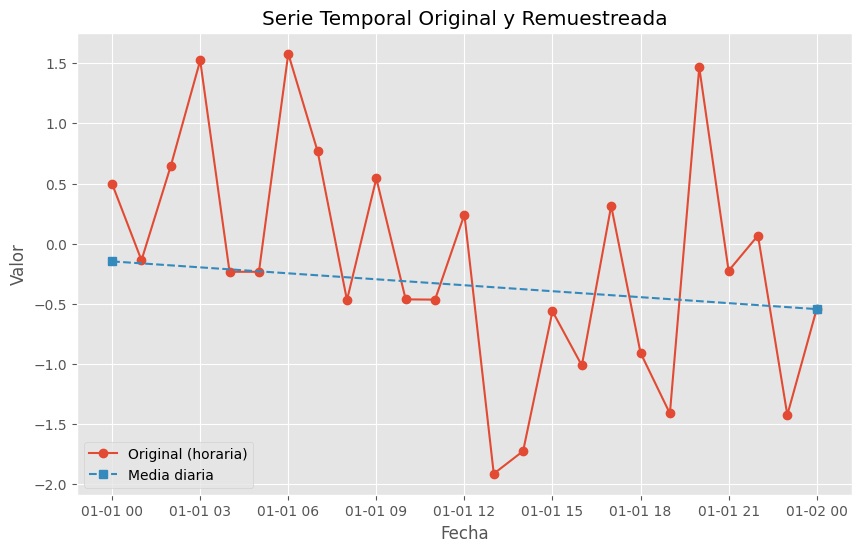

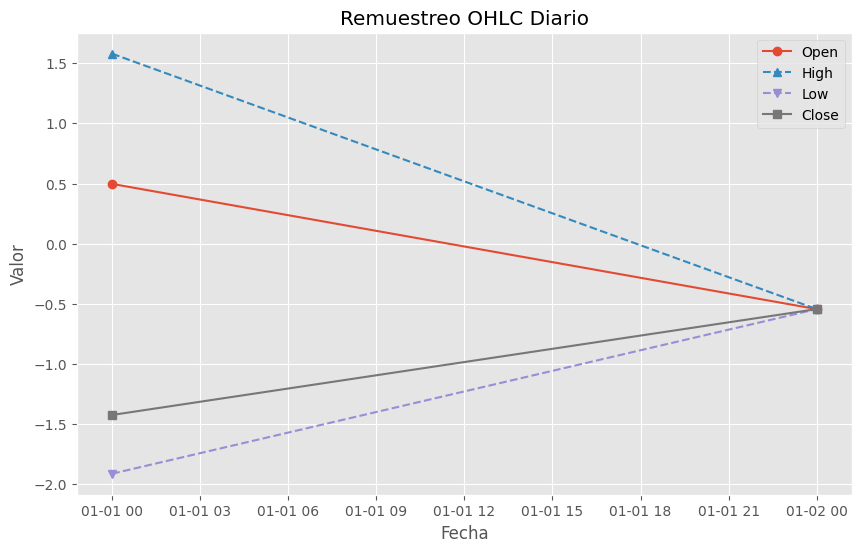

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Estilo compatible con matplotlib

# Genera datos horarios
np.random.seed(42)
date_rng = pd.date_range(start="2025-01-01", end="2025-01-02", freq="h")  
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Submuestreo a diario (media)
daily_mean = ts.resample("D").mean()
print("Submuestreo a diario (media):")
print(daily_mean)

# Remuestreo OHLC
ohlc_data = ts.resample("D").ohlc()
print("\nRemuestreo OHLC diario:")
print(ohlc_data)

#Sobremuestreo a 30 minutos con interpolación
ts_interp = ts.resample("30min").interpolate()
print("\nSobremuestreo a 30 minutos (interpolación lineal):")
print(ts_interp.head())

#Remuestreo con PeriodIndex (convertido a DatetimeIndex)
period_rng = pd.period_range(start="2025-01", end="2025-03", freq="M")
ts_period = pd.Series(np.random.randn(3), index=period_rng)

# Convertir PeriodIndex a DatetimeIndex antes de remuestrear
ts_period_dt = ts_period.to_timestamp()
quarterly_sum = ts_period_dt.resample("QE").sum()
print("\nRemuestreo de PeriodIndex (convertido a DatetimeIndex) a trimestral:")
print(quarterly_sum)

# Remuestreo de tiempo agrupado (cada 6 horas)
ts_6h = ts.resample("6h").mean()  
print("\nRemuestreo agrupado cada 6 horas:")
print(ts_6h.head())

# Graficar serie original y remuestreada
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts, marker='o', linestyle='-', label='Original (horaria)')
plt.plot(daily_mean.index, daily_mean, marker='s', linestyle='--', label='Media diaria')
plt.title('Serie Temporal Original y Remuestreada')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Graficar OHLC
plt.figure(figsize=(10, 6))
plt.plot(ohlc_data.index, ohlc_data['open'], marker='o', linestyle='-', label='Open')
plt.plot(ohlc_data.index, ohlc_data['high'], marker='^', linestyle='--', label='High')
plt.plot(ohlc_data.index, ohlc_data['low'], marker='v', linestyle='--', label='Low')
plt.plot(ohlc_data.index, ohlc_data['close'], marker='s', linestyle='-', label='Close')
plt.title('Remuestreo OHLC Diario')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

### Funciones de ventana móvil
Las ventanas móviles calculan estadísticas sobre un subconjunto deslizante de datos, usando `rolling()` o `expanding()`
**Funciones ponderadas exponencialmente**
- `ewm()` aplica pesos exponenciales para dar más importancia a datos recientes
**Funciones binarias de ventana móvil**
- Métodos como `rolling().corr()` calculan correlaciones entre series
**Funciones de ventana móvil definidas por el usuario**
- Se puede aplicar funciones personalizadas con `rolling().apply()`

In [ ]:
import pandas as pd
import numpy as np

# Genera datos
np.random.seed(42)
date_rng = pd.date_range(start="2025-01-01", end="2025-01-10", freq="D")
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Media móvil de 3 días
print("Media móvil de 3 días:")
print(ts.rolling(window=3).mean())

# Media ponderada exponencialmente
print("\nMedia ponderada exponencialmente:")
print(ts.ewm(span=3).mean())

# Correlación móvil entre dos series
ts2 = pd.Series(np.random.randn(len(date_rng)), index=date_rng)
print("\nCorrelación móvil de 3 días:")
print(ts.rolling(window=3).corr(ts2))

# Función personalizada
def custom_func(x):
    return np.sum(x**2)

print("\nFunción personalizada (suma de cuadrados) en ventana de 3 días:")
print(ts.rolling(window=3).apply(custom_func))

Media móvil de 3 días:
2025-01-01         NaN
2025-01-02         NaN
2025-01-03    0.335379
2025-01-04    0.677485
2025-01-05    0.645522
2025-01-06    0.351580
2025-01-07    0.370307
2025-01-08    0.704170
2025-01-09    0.625724
2025-01-10    0.280173
Freq: D, dtype: float64

Media ponderada exponencialmente:
2025-01-01    0.496714
2025-01-02    0.073395
2025-01-03    0.401563
2025-01-04    0.999679
2025-01-05    0.362862
2025-01-06    0.059624
2025-01-07    0.825401
2025-01-08    0.796304
2025-01-09    0.162176
2025-01-10    0.352554
Freq: D, dtype: float64

Correlación móvil de 3 días:
2025-01-01         NaN
2025-01-02         NaN
2025-01-03    0.650640
2025-01-04   -0.681868
2025-01-05   -0.076771
2025-01-06   -0.607304
2025-01-07    0.128806
2025-01-08   -0.276350
2025-01-09    0.048134
2025-01-10    0.395968
Freq: D, dtype: float64

Función personalizada (suma de cuadrados) en ventana de 3 días:
2025-01-01         NaN
2025-01-02         NaN
2025-01-03    0.685342
2025-01-04    2.

### Conclusión
El capitulo que hemos desarrollado cubre herramientas esenciales para el analisis de series temporales en `pandas`, desde la manipulación de fechas y zonas horarias hasta el remuestreo y las ventanas moviles. Estas tecnicas son fundamentales para trabajar con datos temporales en contextos como finanzas, meteorología o análisis de eventos.